In [56]:
# import libraries 
import torch
import torch.nn as nn
from torch.autograd import Variable

In [57]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [58]:
# create data
Xs = torch.Tensor([[0., 0.],
               [0., 1.],
               [1., 0.],
               [1., 1.]])

y = torch.Tensor([0., 1., 1., 0.]).reshape(Xs.shape[0], 1)

In [91]:
class XOR(nn.Module):
    def __init__(self):
        super(XOR, self).__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(2, 2),
            nn.Sigmoid(),
            nn.Linear(2, 1),
        )

    def forward(self, x):
        yh = self.layer_stack(x)
        return yh

In [113]:
xor_network = XOR()

In [114]:
Xs = Xs.to(device)
y = y.to(device)
xor_network = xor_network.to(device)

In [115]:
epochs = 1000 
mseloss = nn.MSELoss() 
optimizer = torch.optim.Adam(xor_network.parameters(), lr = 0.03) 
all_losses = [] 
current_loss = 0 
plot_every = 50 
 
for epoch in range(epochs): 
   
    # input training example and return the prediction   
    yhat = xor_network.forward(Xs)
    
    # calculate MSE loss   
    loss = mseloss(yhat, y)
      
    # backpropogate through the loss gradiants   
    loss.backward()
    
    # update model weights   
    optimizer.step()
    
    # remove current gradients for next iteration   
    optimizer.zero_grad() 
   
    # append to loss   
    current_loss += loss  
 
    if epoch % plot_every == 0:
        all_losses.append((current_loss / plot_every).item())       
        current_loss = 0 
     
    # print progress   
    if epoch % 100 == 0:     
        print(f'Epoch: {epoch} completed')      

Epoch: 0 completed
Epoch: 100 completed
Epoch: 200 completed
Epoch: 300 completed
Epoch: 400 completed
Epoch: 500 completed
Epoch: 600 completed
Epoch: 700 completed
Epoch: 800 completed
Epoch: 900 completed


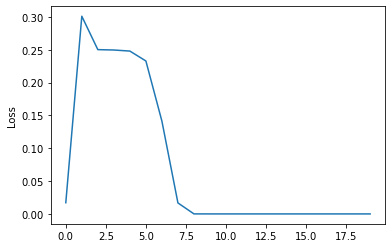

In [116]:
import matplotlib.pyplot as plt
plt.plot(all_losses)
plt.ylabel('Loss')
plt.show()

In [112]:
all_losses

[0.016794314607977867,
 0.2960636019706726,
 0.2482893317937851,
 0.24191874265670776,
 0.21509765088558197,
 0.15570835769176483,
 0.05484561249613762,
 0.0023229653015732765,
 1.5824600723135518e-06,
 2.2435928315189813e-07,
 9.531369471460494e-08,
 1.3366205564580014e-07,
 9.731781602795309e-08,
 9.232889652821541e-08,
 9.346068452487089e-08,
 1.1213352735239823e-07,
 9.740946183001142e-08,
 9.77333058926888e-08,
 1.0773776892847309e-07,
 1.0235934411184644e-07]

In [49]:
xor_network.forward(Xs)

tensor([[0.0000e+00],
        [1.0000e+00],
        [1.0000e+00],
        [1.4901e-08]], grad_fn=<AddmmBackward0>)

In [51]:
print(xor_network.layer_stack[0].weight)
print(xor_network.layer_stack[0].bias)
print(xor_network.layer_stack[2].weight)
print(xor_network.layer_stack[2].bias)

Parameter containing:
tensor([[-2.6203, -2.6238],
        [-5.4236, -5.4606]], requires_grad=True)
Parameter containing:
tensor([3.3443, 1.6079], requires_grad=True)
Parameter containing:
tensor([[ 1.9163, -1.9227]], requires_grad=True)
Parameter containing:
tensor([-0.2492], requires_grad=True)


In [52]:
Xs.is_cuda

False

In [ ]:
X